<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/ARMA_ARIMA_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREATING ARMA AND ARIMA MODELS WITH PYTHON

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
# ignore warnings

import warnings 
warnings.filterwarnings("ignore")

Load forecasting tools

In [0]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
pip install pmdarima


     |████████████████████████████████| 921kB 4.6MB/s 
     |████████████████████████████████| 24.8MB 1.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


In [0]:
from pmdarima import auto_arima

Load data

In [0]:
df1  = pd.read_csv('DailyTotalFemaleBirths.csv', index_col = "Date", parse_dates = True)
df1.index.freq = 'D'

Grab the first four months of data.

In [0]:
df1 = df1[:120]

In [0]:
# Read in the TradeInventories dataset

df2 = pd.read_csv('TradeInventories.csv', index_col = 'Date', parse_dates = True)
df2.index.freq = 'MS'

## Auto Regressive Moving Average (ARMA) Model

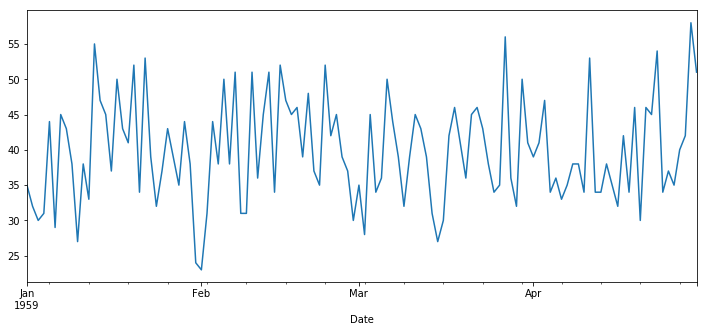

In [11]:
# Plot the data 
df1['Births'].plot(figsize = (12, 5));

 Run ADF_TEST function which performs and augmente Dickey-Fuller test

In [0]:


from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [13]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Perform auto ARIMA 

In [14]:
auto_arima(df1['Births'], seasonal = False).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(2, 2)   Log Likelihood                -405.370
Method:                       css-mle   S.D. of innovations              6.991
Date:                Wed, 10 Jul 2019   AIC                            822.741
Time:                        01:10:09   BIC                            839.466
Sample:                             0   HQIC                           829.533
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8163      0.108    368.848      0.000      39.605      40.028
ar.L1.y        1.8569      0.081     22.935      0.000       1.698       2.016
ar.L2.y       -0.8814      0.073    -12.032      0.000      -1.025      -0.738
ma.L1.y       -1.8634      0.109    -17.126      0.000      -2.077      -1.650
ma.L2.y        0.8634      0.108      8.020      0.000       0.652       1.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0533           -0.1582j            1.0651           -0.0237
AR.2            1.0533           +0.1582j            1.0651            0.0237
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.1582           +0.0000j            1.1582            0.0000
-----------------------------------------------------------------------------
"""

The summary suggests an ARMA model of order 2. 
We need to split our data into a test and train sets. Since we are attempting to do a one month forecast, ~25% of our data needs to be used for the test set. 

In [0]:
# Create train and test sets

train = df1.iloc[:90]
test  = df1.iloc[90:]

In [0]:
# create model

model = ARMA(train['Births'], order = (2,2))

In [0]:
# Fit the model

results = model.fit()

In [18]:

# Get model's summary

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Wed, 10 Jul 2019   AIC                            627.809
Time:                        01:10:09   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
# Forecast a month into the future

start = len(train)
end = len(train) + len(test) - 1

In [0]:
# predict

predictions = results.predict(start, end).rename('ARMA (2,2) Predictions')

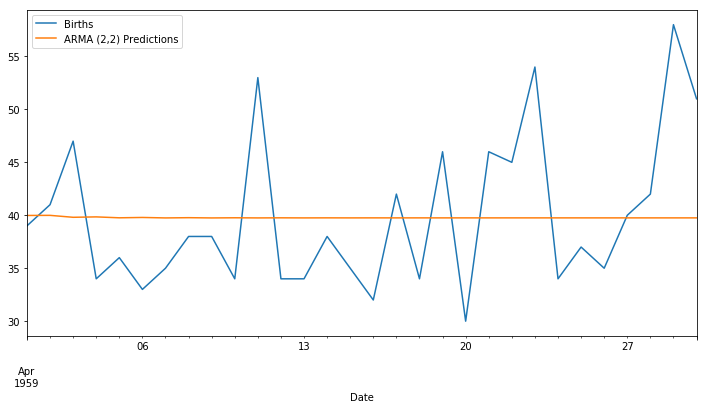

In [21]:
# Visualize Predictions

test['Births'].plot(figsize = (12,6), legend = True);
predictions.plot(legend = True)

The predicton looks linear but considering that the dataset showed no seasonality nor trend the predicton actually makes sense. Let's look at the mean of the test set and the mean of the predictions:


In [22]:
test.mean()

Births    39.833333
dtype: float64

In [23]:
predictions.mean()

39.777434306528306

As we can see, the model was not able to predict the noise in the data but it was able to predict the actual mean average for the next month worth of data. 

# ARIMA MODEL

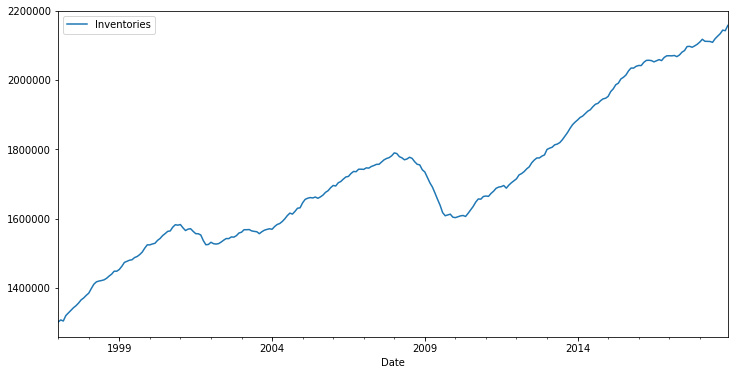

In [24]:
# plot the df

df2.plot(figsize = (12 , 6))

In [0]:
 # Run a ETS Decomposition
  
  from statsmodels.tsa.seasonal import seasonal_decompose
  

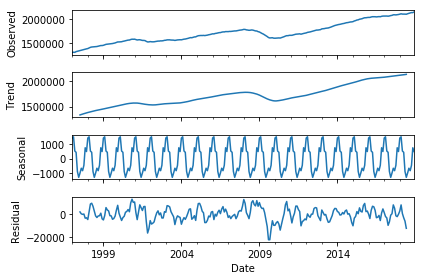

In [26]:
result =  seasonal_decompose(df2['Inventories'], model = 'add')
result.plot();

In [27]:
# auto arima model

auto_arima(df2['Inventories'], seasonal = False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.259
Date:                Wed, 10 Jul 2019   AIC                           5228.505
Time:                        01:10:12   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3463.1883   1313.147      2.637      0.009     889.468    6036.909
ar.L1.D.y      0.9037      0.039     23.414      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1066           +0.0000j            1.1066            0.0000
MA.1            1.7447           +0.0000j            1.7447            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
# get the difference order 1

from statsmodels.tsa.statespace.tools import diff

In [0]:
df2['Diff_1'] = diff(df2['Inventories'], k_diff=1)

In [30]:
# run augmente Dickey-Fuller test on diff_1

adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


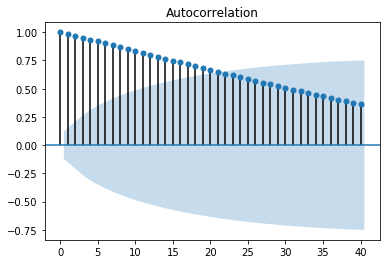

In [31]:
# plot acf and pacf

plot_acf(df2['Inventories'], lags = 40);

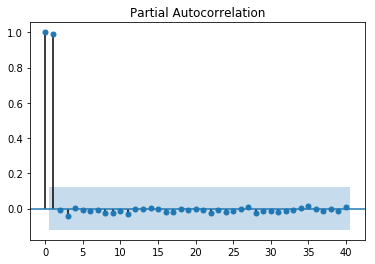

In [32]:
plot_pacf(df2['Inventories'], lags = 40);

In [33]:
stepwise_fit = auto_arima(df2['Inventories'], start_p=0, start_q=0, max_p=2, max_q=2,
                         seasonal = False, trace = True)

stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.006 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.085 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.811, Fit time=0.072 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.842, Fit time=0.086 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.527, BIC=5247.388, Fit time=0.287 seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.505, BIC=5242.794, Fit time=0.123 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.325, BIC=5247.186, Fit time=0.098 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.785 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.259
Date:                Wed, 10 Jul 2019   AIC                           5228.505
Time:                        01:10:14   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3463.1883   1313.147      2.637      0.009     889.468    6036.909
ar.L1.D.y      0.9037      0.039     23.414      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1066           +0.0000j            1.1066            0.0000
MA.1            1.7447           +0.0000j            1.7447            0.0000
-----------------------------------------------------------------------------
"""

In [34]:
# Train Model
# split data into train and test sets

len(df2)

264

In [0]:
train = df2.iloc[:252]

# grab last year worth of data for testing

test = df2.iloc[252:]

In [36]:
# Create the ARIMA model

model = ARIMA(train['Inventories'], order = (1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Wed, 10 Jul 2019   AIC                           4980.790
Time:                        01:10:14   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.6171   1344.919      2.378      0.018     561.625    5833.610
ar.L1.D.Inventories     0.9026      0.039     23.013      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.049      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
# Make predictions

start = len(train)
end = len(train) + len(test) -1

predictions = results.predict(start=start, end=end, typ='levels').rename('ARIMA (1,1,1) Predictions')

In [38]:
predictions

2018-01-01    2.107148e+06
2018-02-01    2.110526e+06
2018-03-01    2.113886e+06
2018-04-01    2.117231e+06
2018-05-01    2.120561e+06
2018-06-01    2.123878e+06
2018-07-01    2.127184e+06
2018-08-01    2.130479e+06
2018-09-01    2.133765e+06
2018-10-01    2.137042e+06
2018-11-01    2.140311e+06
2018-12-01    2.143573e+06
Freq: MS, Name: ARIMA (1,1,1) Predictions, dtype: float64

In [39]:
test

,Inventories,Diff_1
Date,,
2018-01-01,2110158,6407.0
2018-02-01,2118199,8041.0
2018-03-01,2112427,-5772.0
2018-04-01,2112276,-151.0
2018-05-01,2111835,-441.0
2018-06-01,2109298,-2537.0
2018-07-01,2119618,10320.0
2018-08-01,2127170,7552.0
2018-09-01,2134172,7002.0


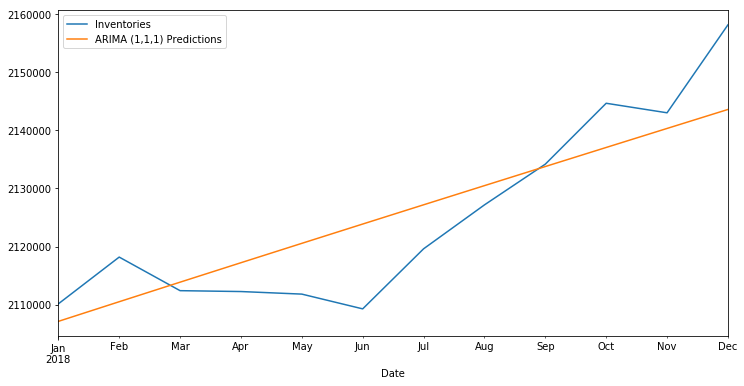

In [40]:
test['Inventories'].plot(legend = True, figsize = (12,6));
predictions.plot(legend=True);

In [0]:
# Evaluate the model using rmse
from statsmodels.tools.eval_measures import rmse

In [42]:
error = rmse(test['Inventories'], predictions)
error

7789.561238050531

In [43]:
test['Inventories'].mean()

2125075.6666666665

## Forecasting into Unknown Future

In [0]:
model = ARIMA(df2['Inventories'], order = (1,1,1))

In [0]:
results = model.fit()

In [0]:
forecast = results.predict(start = len(df2), end = len(df2)+11, typ = 'levels').rename('ARIMA (1,1,1) FORECAST')

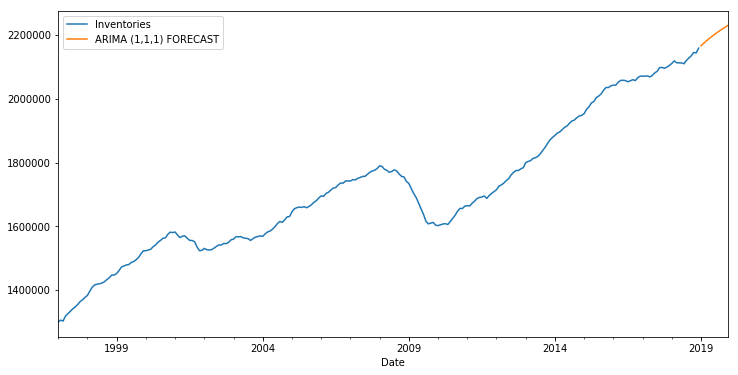

In [47]:
df2['Inventories'].plot(legend = True, figsize = (12, 6));
forecast.plot(legend = True);